In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
pd.set_option('display.max_rows',70)
pd.set_option('display.max_columns',None)

In [4]:
raw_train = pd.read_csv('sales_train.csv')
item_df = pd.read_csv('items.csv')
shops_df = pd.read_csv('shops.csv')


# Cleaning The Data
Checking the data for any outliers and oddities

In [29]:
negative_sales = raw_train[raw_train.item_cnt_day < 0]
negative_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [30]:
negative_sales.item_cnt_day.min()

-22.0

In [31]:
negative_sales[negative_sales.item_cnt_day == -22.0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1057907,02.11.2013,10,12,8023,15.0,-22.0


In [32]:
# View data history of the negative sales example
raw_grpd = raw_train.groupby(['shop_id','item_id'])
raw_grpd.get_group((12,8023))

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
511574,31.05.2013,4,12,8023,20.0,1.0
885224,25.09.2013,8,12,8023,15.0,22.0
1057907,02.11.2013,10,12,8023,15.0,-22.0
1175066,27.12.2013,11,12,8023,15.0,1.0
1330814,27.01.2014,12,12,8023,15.0,20.0


Looking at the data thhe negative sales seems to be useful parameter and don't seem to show any large day by day fluctuations, but this could change for monthly sales

{'whiskers': [<matplotlib.lines.Line2D at 0x12ed3ccf8>,
 'caps': [<matplotlib.lines.Line2D at 0x12ed3cdd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ed3c550>],
 'medians': [<matplotlib.lines.Line2D at 0x12ed3f048>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ed3fb00>],
 'means': []}

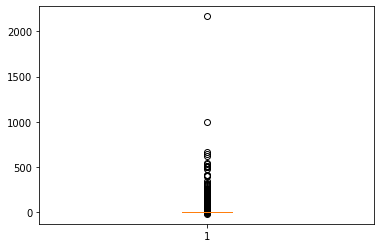

In [48]:
# Look at max daily sales for all shops
plt.boxplot(raw_train.item_cnt_day)

Looking at the data it seems to be that case that we have two data points that seem to be two things that were sold at very large quantites and seem to be outliers, hence it maybe safe to remove thee data points

In [50]:
raw_train[raw_train.item_cnt_day >= 900]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2909818,28.10.2015,33,12,11373,0.908714,2169.0


{'whiskers': [<matplotlib.lines.Line2D at 0x12ed21470>,
 'caps': [<matplotlib.lines.Line2D at 0x12ed21128>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ed21908>],
 'medians': [<matplotlib.lines.Line2D at 0x12ed1bcc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ed11828>],
 'means': []}

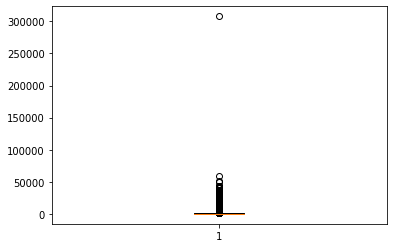

In [51]:
# Look at the item_prices
plt.boxplot(raw_train.item_price)

In [53]:
raw_train[raw_train.item_price == raw_train.item_price.max()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [54]:
raw_grpd.get_group((12,6066))

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


Given this information,it maybe advisible to remove all the outliers and see the data distribution once more

In [59]:
raw_train = raw_train[raw_train.item_price<100000]
raw_train = raw_train[raw_train.item_cnt_day<1000]

{'whiskers': [<matplotlib.lines.Line2D at 0x12d448b38>,
 'caps': [<matplotlib.lines.Line2D at 0x12c206d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d4487f0>],
 'medians': [<matplotlib.lines.Line2D at 0x14f0de208>],
 'fliers': [<matplotlib.lines.Line2D at 0x14f0de9b0>],
 'means': []}

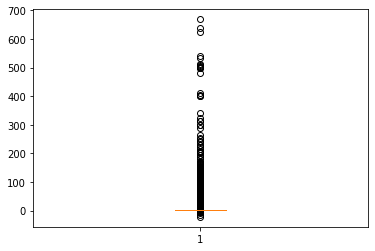

In [60]:
# Look at max daily sales for all shops
plt.boxplot(raw_train.item_cnt_day)

{'whiskers': [<matplotlib.lines.Line2D at 0x12e1d7668>,
 'caps': [<matplotlib.lines.Line2D at 0x12e1d7f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e2efb38>],
 'medians': [<matplotlib.lines.Line2D at 0x12b4215f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x12e334080>],
 'means': []}

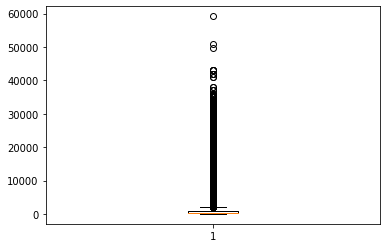

In [61]:
# Look at the item_prices
plt.boxplot(raw_train.item_price)

After removing the outliers the distrbution seems smoother

In [79]:
# Determine the monthly item count
raw_train = raw_train.sort_values(by='date')
raw_grpd_mnthly = raw_train.groupby(['shop_id','item_id','date_block_num'])['item_cnt_day'].sum()

In [80]:
raw_grpd_mnthly.reset_index()
raw_grpd_mnthly_frame = raw_grpd_mnthly.to_frame()
raw_grpd_mnthly_frame.reset_index(inplace=True)

In [81]:
raw_grpd_mnthly_frame

,shop_id,item_id,date_block_num,item_cnt_day
0,0,30,1,31.0
1,0,31,1,11.0
2,0,32,0,6.0
3,0,32,1,10.0
4,0,33,0,3.0
...,...,...,...,...
1609117,59,22164,27,2.0
1609118,59,22164,30,1.0
1609119,59,22167,9,1.0
1609120,59,22167,11,2.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1685db588>,
 'caps': [<matplotlib.lines.Line2D at 0x1685e69b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1685db0b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1685e6160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1685e7d30>],
 'means': []}

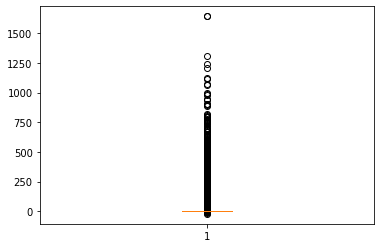

In [82]:
# Lets study if there are any outliers now
plt.boxplot(raw_grpd_mnthly_frame.item_cnt_day)

# Converting Data to Time Series

In [84]:
for block_num in range(0,34):
    raw_grpd_mnthly_frame['block_num_'+str(block_num)] = 0.0 

In [85]:
raw_grpd_mnthly_frame

,shop_id,item_id,date_block_num,item_cnt_day,block_num_0,block_num_1,block_num_2,block_num_3,block_num_4,block_num_5,...,block_num_24,block_num_25,block_num_26,block_num_27,block_num_28,block_num_29,block_num_30,block_num_31,block_num_32,block_num_33
0,0,30,1,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,32,1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,33,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609117,59,22164,27,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609118,59,22164,30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609119,59,22167,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609120,59,22167,11,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
unique_shopid = raw_grpd_mnthly_frame['shop_id'].unique()
unique_shopid

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [87]:
unique_itemid = raw_grpd_mnthly_frame['item_id'].unique()

In [97]:
unique_itemid = np.sort(unique_itemid)

In [100]:
uni
# time_seq_train = pd.DataFrame(np.array([unique_shopid, unique_itemid]), columns=['shop_id','item_id'])

unique_itemid

array([    0,     1,     2, ..., 22167, 22168, 22169])

In [139]:
time_seq_data = raw_grpd_mnthly_frame.pivot_table(index=['shop_id','item_id'], columns='date_block_num',values='item_cnt_day',fill_value=0).reset_index()


In [140]:
# Rename the columns
cols = {}
for key in range(0,34):
    cols[key] = 'block_num_'+str(key)
time_seq_data = time_seq_data.rename(columns=cols)
time_seq_data

date_block_num,shop_id,item_id,block_num_0,block_num_1,block_num_2,block_num_3,block_num_4,block_num_5,block_num_6,block_num_7,block_num_8,block_num_9,block_num_10,block_num_11,block_num_12,block_num_13,block_num_14,block_num_15,block_num_16,block_num_17,block_num_18,block_num_19,block_num_20,block_num_21,block_num_22,block_num_23,block_num_24,block_num_25,block_num_26,block_num_27,block_num_28,block_num_29,block_num_30,block_num_31,block_num_32,block_num_33
0,0,30,0,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424118,59,22154,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
424119,59,22155,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
424120,59,22162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,1,1,0,0,1,0,0
424121,59,22164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,0,0,1,0,0,0


In [138]:
raw_monthly = raw_grpd_mnthly.to_frame().reset_index()
raw_monthly

,shop_id,item_id,date_block_num,item_cnt_day
0,0,30,1,31.0
1,0,31,1,11.0
2,0,32,0,6.0
3,0,32,1,10.0
4,0,33,0,3.0
...,...,...,...,...
1609117,59,22164,27,2.0
1609118,59,22164,30,1.0
1609119,59,22167,9,1.0
1609120,59,22167,11,2.0


# Adding Features and Setting up for Training

In [ ]:
raw_monthly.rename(columns={'item_cnt_day':'item_cnt_month'}, inplace=True)
raw_monthly = raw_monthly[['item_cnt_month','shop_id','item_id','date_block_num']]
raw_monthly

In [ ]:
time_seq_data_grpd = time_seq_data.groupby(['shop_id','item_id'])

In [176]:
def time_lag(row, lag, time_seq_data):
    key  = (int(row['shop_id']), int(row['item_id']))
    curr_block = int(row['date_block_num'])
    prev_block = curr_block - lag
    val = 0
    if prev_block < 0:
        return 0
    val = time_seq_data.get_group(key)['block_num_'+str(prev_block)].values[0]
    return val
        

In [177]:
raw_monthly['T-1_mnth_cnt'] = raw_monthly.apply(time_lag, args=(1,time_seq_data_grpd,), axis=1)

In [180]:
raw_monthly['T-2_mnth_cnt'] = raw_monthly.apply(time_lag, args=(2,time_seq_data_grpd,), axis=1)

In [182]:
raw_monthly['T-3_mnth_cnt'] = raw_monthly.apply(time_lag, args=(3,time_seq_data_grpd,), axis=1)

In [183]:
raw_monthly

,item_cnt_month,shop_id,item_id,date_block_num,T-1_mnth_cnt,T-2_mnth_cnt,T-3_mnth_cnt
0,31.0,0,30,1,0,0,0
1,11.0,0,31,1,0,0,0
2,6.0,0,32,0,0,0,0
3,10.0,0,32,1,6,0,0
4,3.0,0,33,0,0,0,0
...,...,...,...,...,...,...,...
1609117,2.0,59,22164,27,1,2,0
1609118,1.0,59,22164,30,0,0,2
1609119,1.0,59,22167,9,0,0,0
1609120,2.0,59,22167,11,0,1,0


In [191]:
# Adding avergage lagged item counts to the data
def time_lag_sales_avg(row, lag, time_seq_data):
    key  = (int(row['shop_id']), int(row['item_id']))
    curr_block = int(row['date_block_num'])
    prev_block = curr_block - lag
    total = 0.0
    for block_num in range(prev_block, curr_block):
        if block_num < 0:
            total += 0.0
        else:
            val = time_seq_data.get_group(key)['block_num_'+str(block_num)].values[0]
            val = float(val)
            total += val
    return total/float(lag)

In [192]:
raw_monthly["T-2_avg_mnth_cnt"] = raw_monthly.apply(time_lag_sales_avg,
                                                   args=(2, time_seq_data_grpd,),
                                                   axis=1)

In [194]:
raw_monthly["T-3_avg_mnth_cnt"] = raw_monthly.apply(time_lag_sales_avg,
                                                   args=(3, time_seq_data_grpd,),
                                                   axis=1)

In [195]:
raw_monthly

,item_cnt_month,shop_id,item_id,date_block_num,T-1_mnth_cnt,T-2_mnth_cnt,T-3_mnth_cnt,T-2_avg_mnth_cnt,T-3_avg_mnth_cnt
0,31.0,0,30,1,0,0,0,0.0,0.000000
1,11.0,0,31,1,0,0,0,0.0,0.000000
2,6.0,0,32,0,0,0,0,0.0,0.000000
3,10.0,0,32,1,6,0,0,3.0,2.000000
4,3.0,0,33,0,0,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
1609117,2.0,59,22164,27,1,2,0,1.5,1.000000
1609118,1.0,59,22164,30,0,0,2,0.0,0.666667
1609119,1.0,59,22167,9,0,0,0,0.0,0.000000
1609120,2.0,59,22167,11,0,1,0,0.5,0.333333


In [197]:
raw_monthly.to_csv('LSTM_Train_V2.csv', index=False)

In [210]:
# Attempting to add price features and price variance information
avg_price = raw_train.groupby(['shop_id','item_id','date_block_num'])['item_price'].mean()
avg_price = avg_price.to_frame()
avg_price = avg_price.reset_index()
avg_price_grpd = avg_price.groupby(['shop_id','item_id'])
avg_price

,shop_id,item_id,date_block_num,item_price
0,0,30,1,265.0
1,0,31,1,434.0
2,0,32,0,221.0
3,0,32,1,221.0
4,0,33,0,347.0
...,...,...,...,...
1609117,59,22164,27,699.0
1609118,59,22164,30,699.0
1609119,59,22167,9,299.0
1609120,59,22167,11,299.0


In [269]:
# Attempting to add price features
price_variance = raw_train.groupby(['shop_id','item_id'])['item_price'].var(ddof=False).fillna(0)
price_variance = price_variance.to_frame().reset_index()
price_variance = price_variance.rename(columns={'item_price':'price_var'})
price_var_grpd = price_variance.groupby(['shop_id','item_id'])
price_variance

,shop_id,item_id,price_var
0,0,30,0.000000
1,0,31,0.000000
2,0,32,0.000000
3,0,33,0.000000
4,0,35,0.000000
...,...,...,...
424118,59,22154,0.000000
424119,59,22155,0.000000
424120,59,22162,380.859375
424121,59,22164,625.000000


In [205]:
raw_grpd.get_group((59,22154))

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0


In [217]:
def overall_avg_price(row, avg_price):
    key  = (int(row['shop_id']), int(row['item_id']))
    return float(avg_price.get_group(key)['item_price'].values[0])

In [218]:
raw_monthly['overall_shop_and_item_avg_price'] = raw_monthly.apply(overall_avg_price, 
                                                    args=(avg_price_grpd,),
                                                    axis=1)

In [224]:
def overall_var_price(row, price_variance):
    key  = (int(row['shop_id']), int(row['item_id']))
    return float(price_variance.get_group(key)['price_var'].values[0])

In [270]:
raw_monthly['overall_shop_item_price_variance'] = raw_monthly.apply(overall_var_price,
                                                                   args=(price_var_grpd,),
                                                                   axis=1)

In [262]:
price_variance

,shop_id,item_id,price_var
0,0,30,0.00
1,0,31,0.00
2,0,32,0.00
3,0,33,0.00
4,0,35,0.00
...,...,...,...
424118,59,22154,0.00
424119,59,22155,0.00
424120,59,22162,406.25
424121,59,22164,750.00


In [263]:
raw_grpd.get_group((59,22164))

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2471552,11.02.2015,25,59,22164,749.0,1.0
2483751,13.02.2015,25,59,22164,749.0,1.0
2553728,29.03.2015,26,59,22164,749.0,1.0
2593334,30.04.2015,27,59,22164,699.0,1.0
2593342,22.04.2015,27,59,22164,699.0,1.0
2724674,21.07.2015,30,59,22164,699.0,1.0


In [268]:
raw_train.groupby(['shop_id','item_id'])['item_price'].var(ddof=False)

shop_id  item_id
0        30           0.000000
         31           0.000000
         32           0.000000
         33           0.000000
         35           0.000000
                       ...    
59       22154        0.000000
         22155        0.000000
         22162      380.859375
         22164      625.000000
         22167        0.000000
Name: item_price, Length: 424123, dtype: float64

# Target Mean Embedding of Categories

In [233]:
shop_id_embedding = raw_monthly.groupby(['shop_id'])['item_cnt_month'].mean()
shop_id_embedding = shop_id_embedding.to_frame().reset_index()
shop_id_embedding = shop_id_embedding.rename(columns={'item_cnt_month':'shop_id_embedding'})
shop_id_embedding

,shop_id,shop_id_embedding
0,0,2.427920
1,1,1.922913
2,2,1.968752
3,3,1.685089
4,4,1.850891
...,...,...
55,55,4.965377
56,56,1.779538
57,57,2.352881
58,58,2.153502


In [238]:
shop_id_embed_grpd = shop_id_embedding.groupby(['shop_id'])

In [235]:
item_id_embedding = raw_monthly.groupby(['item_id'])['item_cnt_month'].mean()
item_id_embedding = item_id_embedding.to_frame().reset_index()
item_id_embedding = item_id_embedding.rename(columns={'item_cnt_month':'item_id_embedding'})
item_id_embedding

,item_id,item_id_embedding
0,0,1.000000
1,1,1.200000
2,2,1.000000
3,3,1.000000
4,4,1.000000
...,...,...
21801,22165,1.000000
21802,22166,13.920000
21803,22167,2.946429
21804,22168,1.000000


In [239]:
item_id_embed_grpd = item_id_embedding.groupby(['item_id'])

In [236]:
# May not be able to embed date_block_num
block_num_embedding = raw_monthly.groupby(['date_block_num'])['item_cnt_month'].mean()
block_num_embedding = block_num_embedding.to_frame().reset_index()
block_num_embedding = block_num_embedding.rename(columns={'item_cnt_month':'date_block_num_embedding'})
block_num_embedding

,date_block_num,date_block_num_embedding
0,0,2.079574
1,1,2.137149
2,2,2.299920
3,3,1.961821
4,4,2.007092
...,...,...
29,29,2.009276
30,30,1.884660
31,31,1.973332
32,32,2.454444


In [237]:
def shop_id_embed_val(row, shop_id_embedding):
    key = int(row['shop_id'])
    return float(shop_id_embedding.get_group(key)['shop_id_embedding'].values[0])

def item_id_embed_val(row, item_id_embedding):
    key = int(row['item_id'])
    return float(item_id_embedding.get_group(key)['item_id_embedding'].values[0])

In [240]:
raw_monthly['shop_id_embedding'] = raw_monthly.apply(shop_id_embed_val,
                                    args=(shop_id_embed_grpd,), axis=1)

In [241]:
raw_monthly['item_id_embedding'] = raw_monthly.apply(item_id_embed_val,
                                    args=(item_id_embed_grpd,), axis=1)

In [242]:
raw_monthly

,item_cnt_month,shop_id,item_id,date_block_num,T-1_mnth_cnt,T-2_mnth_cnt,T-3_mnth_cnt,T-2_avg_mnth_cnt,T-3_avg_mnth_cnt,overall_shop_and_item_avg_price,overall_shop_item_price_variance,shop_id_embedding,item_id_embedding
0,31.0,0,30,1,0,0,0,0.0,0.000000,265.0,0.0,2.427920,4.334025
1,11.0,0,31,1,0,0,0,0.0,0.000000,434.0,0.0,2.427920,2.841584
2,6.0,0,32,0,0,0,0,0.0,0.000000,221.0,0.0,2.427920,2.664968
3,10.0,0,32,1,6,0,0,3.0,2.000000,221.0,0.0,2.427920,2.664968
4,3.0,0,33,0,0,0,0,0.0,0.000000,347.0,0.0,2.427920,1.487544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609117,2.0,59,22164,27,1,2,0,1.5,1.000000,749.0,750.0,1.952846,3.100629
1609118,1.0,59,22164,30,0,0,2,0.0,0.666667,749.0,750.0,1.952846,3.100629
1609119,1.0,59,22167,9,0,0,0,0.0,0.000000,299.0,0.0,1.952846,2.946429
1609120,2.0,59,22167,11,0,1,0,0.5,0.333333,299.0,0.0,1.952846,2.946429


In [243]:
raw_monthly_emebedded = raw_monthly.drop(columns=['shop_id','item_id'])

In [244]:
raw_monthly_emebedded.to_csv('LSTM_Train_V3.csv', index=False)

In [246]:
# Add category_id embedding
items_grpd = item_df.groupby(['item_id'])
item_df

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [247]:
def add_cat_id(row, items_grpd):
    key = int(row['item_id'])
    return int(items_grpd.get_group(key)['item_category_id'].values[0])

In [250]:
raw_monthly['category_id'] = raw_monthly.apply(add_cat_id, 
                                               args=(items_grpd,),
                                               axis=1)

In [256]:
# add category_id_embedding
cat_id_embedding = raw_monthly.groupby(['category_id'])['item_cnt_month'].mean()
cat_id_embedding = cat_id_embedding.to_frame().reset_index()
cat_id_embedding.rename(columns={'item_cnt_month':'item_category_id_embedding'},inplace=True)
cat_id_emded_grpd = cat_id_embedding.groupby(['category_id'])
cat_id_embedding

,category_id,item_category_id_embedding
0,0,1.000000
1,1,1.000000
2,2,1.846335
3,3,3.211961
4,4,1.756934
...,...,...
79,79,14.563017
80,80,20.590604
81,81,2.996894
82,82,12.806135


In [255]:
def add_cat_id_embedding(row, cat_id_embedding):
    key = int(row['category_id'])
    return float(cat_id_embedding.get_group(key)['item_category_id_embedding'].values[0])


In [257]:
raw_monthly['item_cat_embedding'] = raw_monthly.apply(add_cat_id_embedding,
                                        args=(cat_id_emded_grpd,),
                                        axis=1)

In [258]:
raw_monthly

,item_cnt_month,shop_id,item_id,date_block_num,T-1_mnth_cnt,T-2_mnth_cnt,T-3_mnth_cnt,T-2_avg_mnth_cnt,T-3_avg_mnth_cnt,overall_shop_and_item_avg_price,overall_shop_item_price_variance,shop_id_embedding,item_id_embedding,category_id,item_cat_embedding
0,31.0,0,30,1,0,0,0,0.0,0.000000,265.0,0.0,2.427920,4.334025,40,1.886919
1,11.0,0,31,1,0,0,0,0.0,0.000000,434.0,0.0,2.427920,2.841584,37,1.510428
2,6.0,0,32,0,0,0,0,0.0,0.000000,221.0,0.0,2.427920,2.664968,40,1.886919
3,10.0,0,32,1,6,0,0,3.0,2.000000,221.0,0.0,2.427920,2.664968,40,1.886919
4,3.0,0,33,0,0,0,0,0.0,0.000000,347.0,0.0,2.427920,1.487544,37,1.510428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609117,2.0,59,22164,27,1,2,0,1.5,1.000000,749.0,750.0,1.952846,3.100629,37,1.510428
1609118,1.0,59,22164,30,0,0,2,0.0,0.666667,749.0,750.0,1.952846,3.100629,37,1.510428
1609119,1.0,59,22167,9,0,0,0,0.0,0.000000,299.0,0.0,1.952846,2.946429,49,2.060196
1609120,2.0,59,22167,11,0,1,0,0.5,0.333333,299.0,0.0,1.952846,2.946429,49,2.060196


In [272]:
raw_monthly_emebedded = raw_monthly.drop(columns=['shop_id','item_id','category_id'])

In [274]:
raw_monthly_emebedded.to_csv('LSTM_Train_V5.csv', index=False)

In [271]:
raw_monthly

,item_cnt_month,shop_id,item_id,date_block_num,T-1_mnth_cnt,T-2_mnth_cnt,T-3_mnth_cnt,T-2_avg_mnth_cnt,T-3_avg_mnth_cnt,overall_shop_and_item_avg_price,overall_shop_item_price_variance,shop_id_embedding,item_id_embedding,category_id,item_cat_embedding
0,31.0,0,30,1,0,0,0,0.0,0.000000,265.0,0.0,2.427920,4.334025,40,1.886919
1,11.0,0,31,1,0,0,0,0.0,0.000000,434.0,0.0,2.427920,2.841584,37,1.510428
2,6.0,0,32,0,0,0,0,0.0,0.000000,221.0,0.0,2.427920,2.664968,40,1.886919
3,10.0,0,32,1,6,0,0,3.0,2.000000,221.0,0.0,2.427920,2.664968,40,1.886919
4,3.0,0,33,0,0,0,0,0.0,0.000000,347.0,0.0,2.427920,1.487544,37,1.510428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609117,2.0,59,22164,27,1,2,0,1.5,1.000000,749.0,625.0,1.952846,3.100629,37,1.510428
1609118,1.0,59,22164,30,0,0,2,0.0,0.666667,749.0,625.0,1.952846,3.100629,37,1.510428
1609119,1.0,59,22167,9,0,0,0,0.0,0.000000,299.0,0.0,1.952846,2.946429,49,2.060196
1609120,2.0,59,22167,11,0,1,0,0.5,0.333333,299.0,0.0,1.952846,2.946429,49,2.060196


In [277]:
time_seq_data

date_block_num,shop_id,item_id,block_num_0,block_num_1,block_num_2,block_num_3,block_num_4,block_num_5,block_num_6,block_num_7,block_num_8,block_num_9,block_num_10,block_num_11,block_num_12,block_num_13,block_num_14,block_num_15,block_num_16,block_num_17,block_num_18,block_num_19,block_num_20,block_num_21,block_num_22,block_num_23,block_num_24,block_num_25,block_num_26,block_num_27,block_num_28,block_num_29,block_num_30,block_num_31,block_num_32,block_num_33
0,0,30,0,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424118,59,22154,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
424119,59,22155,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
424120,59,22162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,1,1,0,0,1,0,0
424121,59,22164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,0,0,1,0,0,0


In [289]:
features = ['shop_id_embedding',
            'item_id_embedding',
            'item_category_id_embedding',
            'avg_item_price',
            'no_sales',
            'days_on_sale']
for feature in features:
    print("Features to add or consider:",feature)

Features to add or consider: shop_id_embedding
Features to add or consider: item_id_embedding
Features to add or consider: item_category_id_embedding
Features to add or consider: avg_item_price
Features to add or consider: no_sales
Features to add or consider: days_on_sale


In [285]:
raw_monthly_features = raw_monthly.drop(['item_cnt_month',
                                         'T-1_mnth_cnt',
                                         'T-2_mnth_cnt',
                                         'T-3_mnth_cnt',
                                         'T-2_avg_mnth_cnt',
                                         'T-3_avg_mnth_cnt'],axis=1)

In [286]:
raw_monthly_features

,shop_id,item_id,date_block_num,overall_shop_and_item_avg_price,overall_shop_item_price_variance,shop_id_embedding,item_id_embedding,category_id,item_cat_embedding
0,0,30,1,265.0,0.0,2.427920,4.334025,40,1.886919
1,0,31,1,434.0,0.0,2.427920,2.841584,37,1.510428
2,0,32,0,221.0,0.0,2.427920,2.664968,40,1.886919
3,0,32,1,221.0,0.0,2.427920,2.664968,40,1.886919
4,0,33,0,347.0,0.0,2.427920,1.487544,37,1.510428
...,...,...,...,...,...,...,...,...,...
1609117,59,22164,27,749.0,625.0,1.952846,3.100629,37,1.510428
1609118,59,22164,30,749.0,625.0,1.952846,3.100629,37,1.510428
1609119,59,22167,9,299.0,0.0,1.952846,2.946429,49,2.060196
1609120,59,22167,11,299.0,0.0,1.952846,2.946429,49,2.060196


In [308]:
# Get avg_price of the item as a whole
item_id_avg_price = raw_train.groupby(['item_id'])['item_price'].mean().to_frame().reset_index()
item_id_avg_price.rename(columns={'item_price':'avg_item_price'}, 
                         inplace=True)
item_id_avg_price_grpd = item_id_avg_price.groupby(['item_id'])
item_id_avg_price

,item_id,avg_item_price
0,0,58.000000
1,1,4490.000000
2,2,58.000000
3,3,79.000000
4,4,58.000000
...,...,...
21802,22165,59.000000
21803,22166,150.000000
21804,22167,297.686490
21805,22168,798.916667


In [364]:
item_id_price_variance = raw_train.groupby(['item_id'])['item_price'].var(ddof=False).fillna(0)
item_id_price_variance = item_id_price_variance.to_frame().reset_index()
item_id_price_variance.rename(columns={'item_price':'item_price_variance'},
                              inplace=True)
item_id_var_grpd = item_id_price_variance.groupby(['item_id'])
item_id_price_variance

,item_id,item_price_variance
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,441.000000
4,4,0.000000
...,...,...
21802,22165,0.000000
21803,22166,0.000000
21804,22167,160.569721
21805,22168,0.034722


In [373]:
item_id_price_variance_monthly = raw_train.groupby(['item_id','date_block_num'])['item_price'].var(ddof=False).fillna(0)
item_id_price_variance_monthly = item_id_price_variance_monthly.to_frame().reset_index()
item_id_price_variance_monthly.rename(columns={'item_price':'monthly_item_price_variance'},
                              inplace=True)
item_id_var_monthly_grpd = item_id_price_variance_monthly.groupby(['item_id','date_block_num'])
item_id_price_variance_monthly

,item_id,date_block_num,monthly_item_price_variance
0,0,20,0.0
1,1,15,0.0
2,1,18,0.0
3,1,19,0.0
4,1,20,0.0
...,...,...,...
233907,22168,0,0.0
233908,22168,1,0.0
233909,22168,2,0.0
233910,22168,8,0.0


In [309]:
def add_item_id_avg_price(row, item_avg_price):
    key = int(row['item_id'])
    return float(item_avg_price.get_group(key)['avg_item_price'].values[0])

raw_monthly_features['avg_item_price'] = raw_monthly_features.apply(add_item_id_avg_price, 
                                                                    args=(item_id_avg_price_grpd,),
                                                                    axis=1)

In [367]:
def add_item_id_price_variance(row, item_price_var):
    key = int(row['item_id'])
    return float(item_price_var.get_group(key)['item_price_variance'].values[0])

raw_monthly_features['item_price_variance'] = raw_monthly_features.apply(add_item_id_price_variance,
                                                                        args=(item_id_var_grpd,),
                                                                        axis=1)

In [375]:
def add_monthly_item_price_variance(row, item_id_var_monthly_grpd):
    key = (int(row['item_id']),int(row['date_block_num']))
    return float(item_id_var_monthly_grpd.get_group(key)['monthly_item_price_variance'].values[0])

raw_monthly_features['monthly_item_price_variance'] = raw_monthly_features.apply(add_monthly_item_price_variance,
                                                                                args=(item_id_var_monthly_grpd,),
                                                                                axis=1)

In [321]:
raw_train_clipped = raw_train.copy(deep=True)
raw_train_clipped['item_cnt_day'] = raw_train_clipped['item_cnt_day'].clip(1,1)
raw_train_clipped

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [338]:
raw_train_days_on_sale = raw_train_clipped.groupby(['shop_id','item_id','date_block_num'])['item_cnt_day'].sum()
raw_train_days_on_sale = raw_train_days_on_sale.to_frame().reset_index()
raw_train_days_on_sale.rename(columns={'item_cnt_day':'days_on_sale'}, inplace=True)
raw_train_days_on_sale

,shop_id,item_id,date_block_num,days_on_sale
0,0,30,1,9.0
1,0,31,1,7.0
2,0,32,0,4.0
3,0,32,1,7.0
4,0,33,0,3.0
...,...,...,...,...
1609119,59,22164,27,2.0
1609120,59,22164,30,1.0
1609121,59,22167,9,1.0
1609122,59,22167,11,2.0


In [340]:
raw_monthly_features = pd.merge(raw_monthly_features, raw_train_days_on_sale, 
                                 on=['shop_id','item_id','date_block_num'])

In [376]:
raw_monthly_features

,shop_id,item_id,date_block_num,overall_shop_and_item_avg_price,overall_shop_item_price_variance,shop_id_embedding,item_id_embedding,category_id,item_cat_embedding,avg_item_price,days_on_sale,item_price_variance,monthly_item_price_variance
0,0,30,1,265.0,0.0,2.427920,4.334025,40,1.886919,323.679206,9.0,11214.462992,1626.414347
1,0,31,1,434.0,0.0,2.427920,2.841584,37,1.510428,578.630005,7.0,23486.302779,5059.538619
2,0,32,0,221.0,0.0,2.427920,2.664968,40,1.886919,249.629240,4.0,9994.327129,1266.308137
3,0,32,1,221.0,0.0,2.427920,2.664968,40,1.886919,249.629240,7.0,9994.327129,1311.123423
4,0,33,0,347.0,0.0,2.427920,1.487544,37,1.510428,252.831928,3.0,13427.980053,1483.491082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609117,59,22164,27,749.0,625.0,1.952846,3.100629,37,1.510428,713.525809,2.0,4328.540922,2962.869822
1609118,59,22164,30,749.0,625.0,1.952846,3.100629,37,1.510428,713.525809,1.0,4328.540922,0.000000
1609119,59,22167,9,299.0,0.0,1.952846,2.946429,49,2.060196,297.686490,1.0,160.569721,0.000000
1609120,59,22167,11,299.0,0.0,1.952846,2.946429,49,2.060196,297.686490,2.0,160.569721,343.624516


In [352]:
# Create monthly features for each shop_id, item_id for every block_num 0-33
monthly_features_grpd = raw_monthly_features.groupby(['shop_id','item_id'])
keys = monthly_features_grpd.groups.keys()
keys = list(keys)

In [345]:
for key in keys:
    cur_df = monthly_features_grpd.get_group(key)
    to_fill_df = fill_missing_block_nums(cur_df)

424123

In [ ]:
def fill_missing_block_nums(df):
    existing_block_nums = df['date_block_num'].values
    for block_num in range(0,34):
        if block_num not in existing_block_nums:
            new_df = 

In [356]:
cur_df = monthly_features_grpd.get_group(keys[2])
cur_df

,shop_id,item_id,date_block_num,overall_shop_and_item_avg_price,overall_shop_item_price_variance,shop_id_embedding,item_id_embedding,category_id,item_cat_embedding,avg_item_price,days_on_sale
2,0,32,0,221.0,0.0,2.42792,2.664968,40,1.886919,249.62924,4.0
3,0,32,1,221.0,0.0,2.42792,2.664968,40,1.886919,249.62924,7.0


In [381]:
raw_train.groupby(['item_id','date_block_num']).get_group((30,1))['item_price'].var(ddof=False)

1626.414347295131

In [384]:
raw_train.groupby(['item_id','date_block_num']).get_group((30,2))

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
224683,01.03.2013,2,41,30,399.0,1.0
224696,02.03.2013,2,41,30,399.0,1.0
224697,03.03.2013,2,41,30,399.0,2.0
224698,07.03.2013,2,41,30,399.0,1.0
224720,25.03.2013,2,41,30,399.0,1.0
224721,08.03.2013,2,41,30,399.0,1.0
226215,31.03.2013,2,44,30,399.0,1.0
226216,16.03.2013,2,44,30,399.0,1.0
226217,15.03.2013,2,44,30,399.0,1.0
226218,14.03.2013,2,44,30,399.0,1.0
